In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

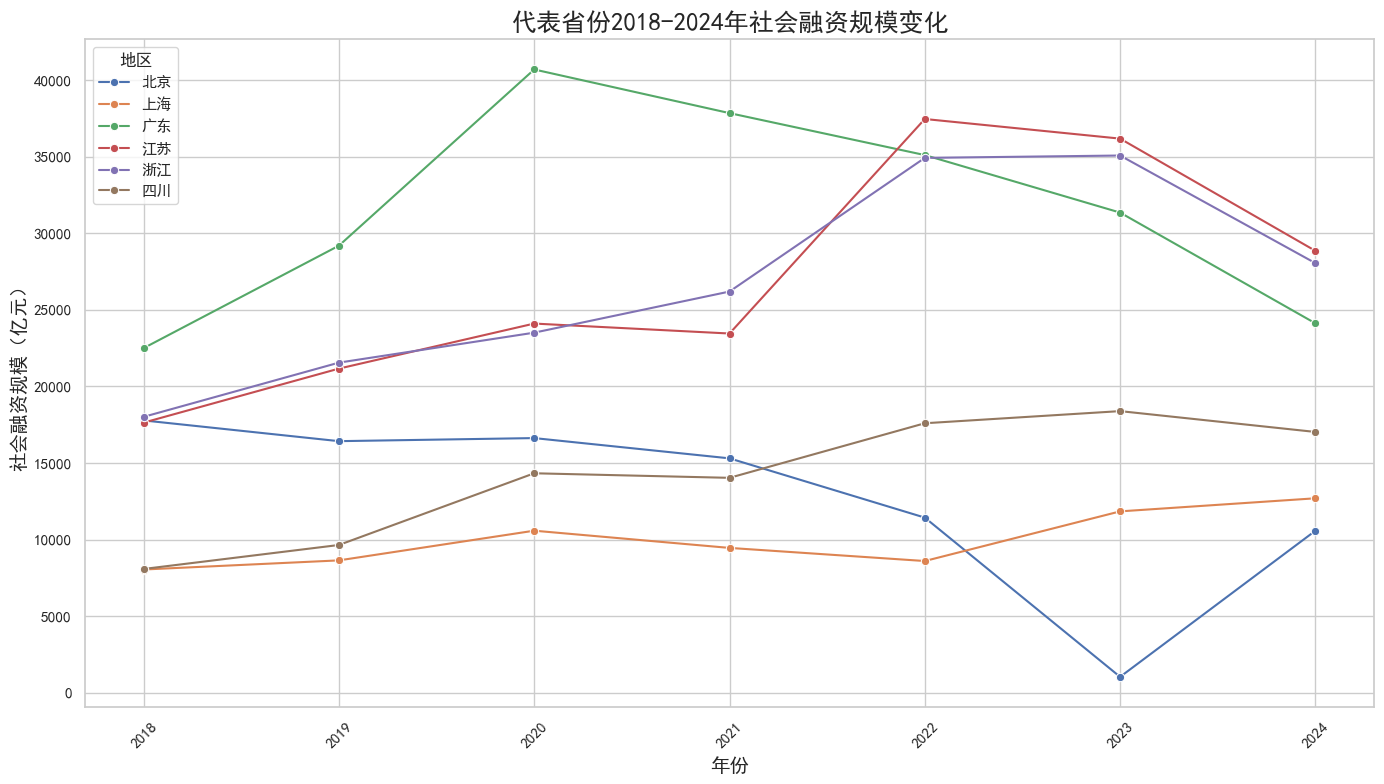

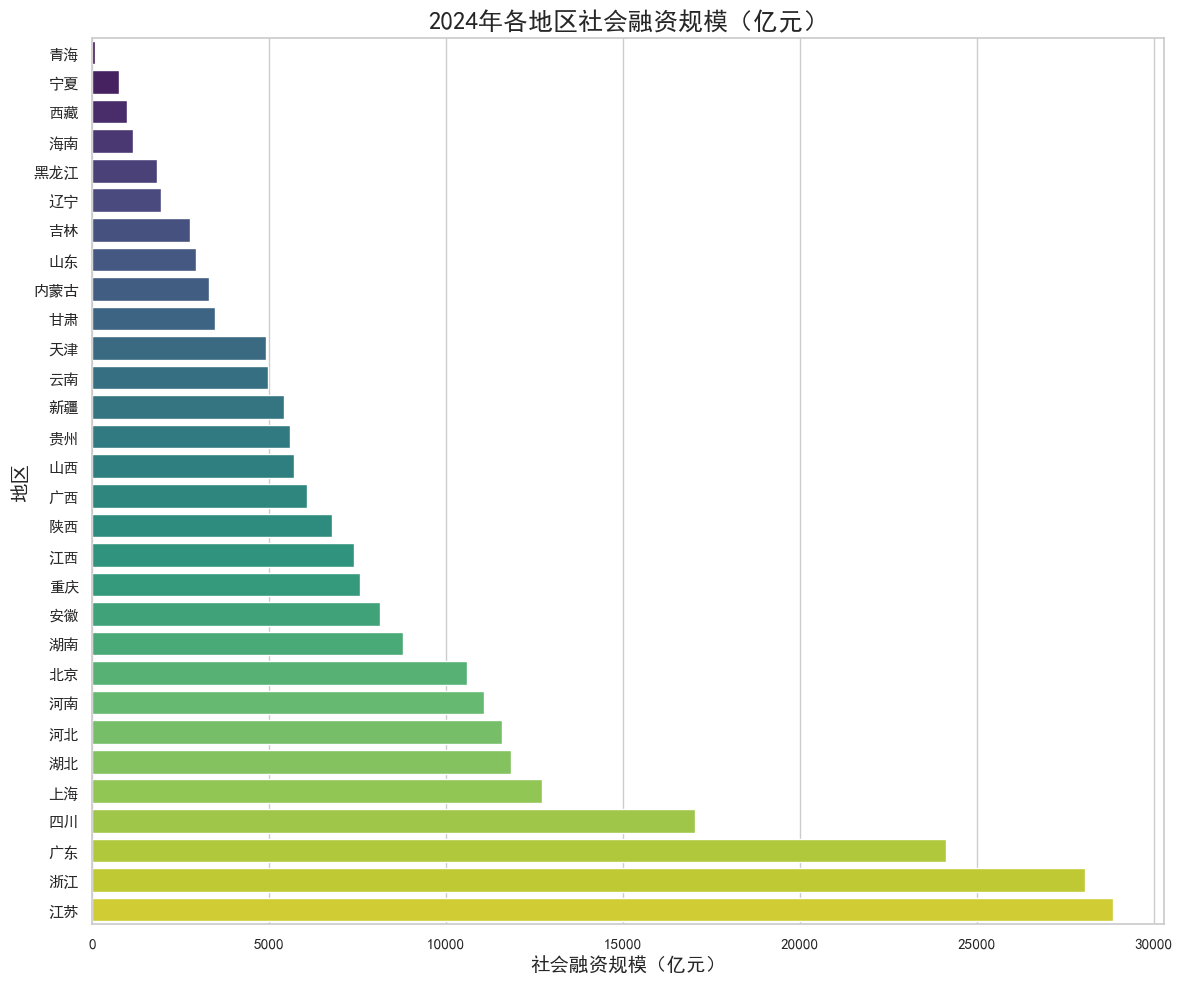

In [28]:

data = {
    "地区": ["北京", "天津", "河北", "山西", "内蒙古", "辽宁", "吉林", "黑龙江", "上海", "江苏", "浙江", "安徽", "江西", "山东", "河南", "湖北", "湖南", "广东", "广西", "海南", "重庆", "四川", "贵州", "云南", "西藏", "陕西", "甘肃", "青海", "宁夏", "新疆"],
    "2018": [17784, 3075, 8399, 3222, 3796, 4429, 4596, 4016, 8052, 17639, 18016, 5538, 5792, 9225, 7794, 6605, 6024, 22502, 4172, 389, 5000, 8087, 4006, 4483, 542, 3599, 2307, 892, 529, 836],
    "2019": [16430, 2866, 8329, 4228, 3929, 4324, 4561, 3967, 8648, 21166, 21556, 6582, 6726, 13831, 11233, 8735, 8850, 29190, 5484, 970, 5970, 9653, 5367, 4982, 23, 4522, 2445, 1278, 801, 2948],
    "2020": [16631, 4102, 10169, 4689, 4569, 4910, 5120, 5069, 10586, 24106, 23512, 9021, 8550, 20108, 11472, 11065, 10461, 40692, 7089, 1141, 8101, 14334, 6667, 5873, 491, 6407, 4106, 1177, 872, 4558],
    "2021": [15308, 3184, 8796, 3637, 3627, 4104, 3038, 3036, 9462, 23456, 26196, 9712, 8291, 20832, 8767, 8870, 9832, 37843, 6308, 1141, 7020, 14036, 4584, 4783, 151, 6204, 2119, 1177, 392, 4614],
    "2022": [11440, 3429, 12255, 3854, 1855, 835, 3537, 2587, 8606, 37459, 34921, 11083, 8624, 21241, 9894, 12321, 11039, 35104, 6956, 1141, 5288, 17599, 4631, 5176, 151, 6839, 1928, 559, 746, 4087],
    "2023": [1045, 5337, 16078, 5547, 911, 2438, 3634, 2112, 11847, 36178, 35075, 11848, 9354, 23510, 11041, 13109, 11390, 31350, 7865, 1141, 7665, 18391, 7116, 6385, 834, 7855, 2336, 396, 1211, 4780],
    "2024": [10584, 4920, 11592, 5699, 3306, 1939, 2772, 1829, 12701, 28852, 28049, 8127, 7388, 2921, 11069, 11835, 8790, 24121, 6058, 1141, 7565, 17031, 5587, 4960, 986, 6786, 3466, 86, 767, 5421],
}

df = pd.DataFrame(data)
df.set_index("地区", inplace=True)
df = df.T

# 设置Seaborn主题
#sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# （1）代表省份社融变化（折线图）
plt.figure(figsize=(14,8))
palette = sns.color_palette("muted")
for region in ["北京", "上海", "广东", "江苏", "浙江", "四川"]:
    sns.lineplot(x=df.index, y=df[region], label=region, marker="o")
plt.title("代表省份2018-2024年社会融资规模变化", fontsize=18)
plt.xlabel("年份", fontsize=14)
plt.ylabel("社会融资规模（亿元）", fontsize=14)
plt.legend(title="地区", loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# （2）2024年各省排名（横向条形图）
plt.figure(figsize=(12,10))
df_2024 = df.loc["2024"].sort_values(ascending=True)
sns.barplot(x=df_2024.values, y=df_2024.index, palette="viridis")
plt.title("2024年各地区社会融资规模（亿元）", fontsize=18)
plt.xlabel("社会融资规模（亿元）", fontsize=14)
plt.ylabel("地区", fontsize=14)
plt.tight_layout()
plt.show()

## 1. 东中西东北板块社融走势比较

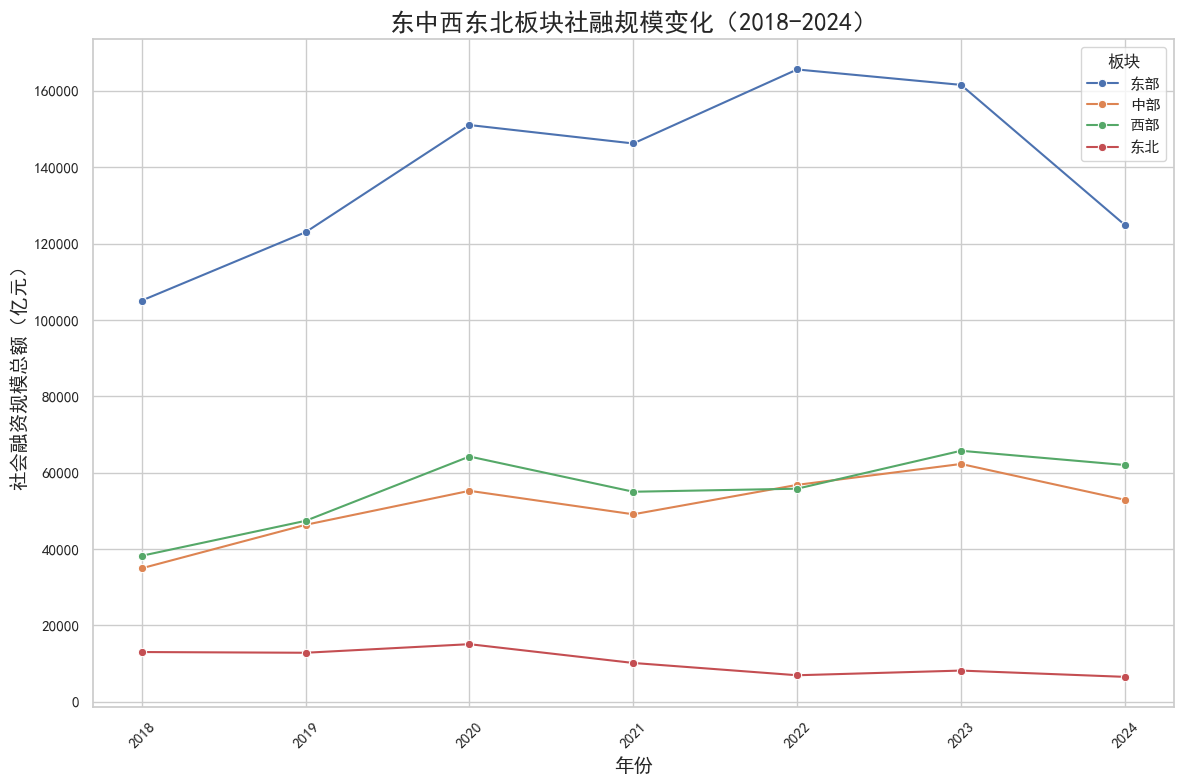

In [10]:

region_groups = {
    "东部": ["北京", "天津", "河北", "上海", "江苏", "浙江", "广东", "福建", "山东", "海南"],
    "中部": ["山西", "安徽", "江西", "河南", "湖北", "湖南"],
    "西部": ["内蒙古", "广西", "重庆", "四川", "贵州", "云南", "西藏", "陕西", "甘肃", "青海", "宁夏", "新疆"],
    "东北": ["辽宁", "吉林", "黑龙江"]
}

group_data = {}
for group, provinces in region_groups.items():
    common_provinces = [p for p in provinces if p in df.columns]
    group_data[group] = df[common_provinces].sum(axis=1)

group_df = pd.DataFrame(group_data)

plt.figure(figsize=(12,8))
for group in group_df.columns:
    sns.lineplot(x=group_df.index, y=group_df[group], label=group, marker="o")
plt.title("东中西东北板块社融规模变化（2018-2024）", fontsize=18)
plt.xlabel("年份", fontsize=14)
plt.ylabel("社会融资规模总额（亿元）", fontsize=14)
plt.legend(title="板块")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. 2018-2024年累计增长率分析

C:\Users\Marvin\AppData\Local\Temp\ipykernel_21500\2584156691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth_rate.values, y=growth_rate.index, palette="coolwarm")


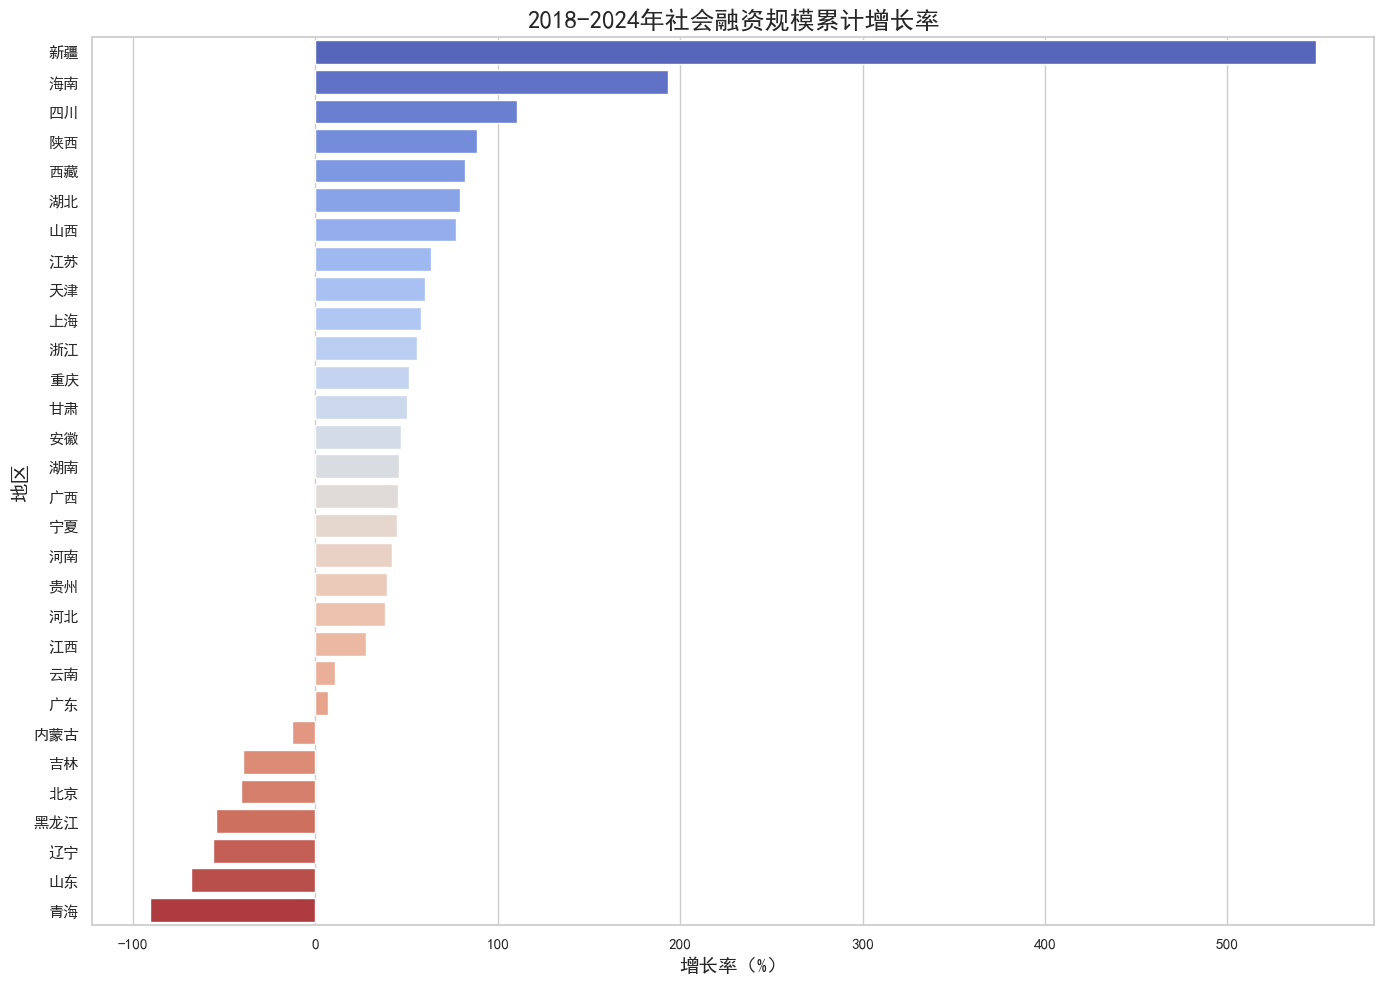

增长率Top5:
地区
新疆    548.444976
海南    193.316195
四川    110.597255
陕西     88.552376
西藏     81.918819
dtype: float64

增长率Bottom5:
地区
北京    -40.485830
黑龙江   -54.457171
辽宁    -56.220366
山东    -68.336043
青海    -90.358744
dtype: float64


In [11]:

growth_rate = (df.loc["2024"] - df.loc["2018"]) / df.loc["2018"] * 100
growth_rate = growth_rate.sort_values(ascending=False)

plt.figure(figsize=(14,10))
sns.barplot(x=growth_rate.values, y=growth_rate.index, palette="coolwarm")
plt.title("2018-2024年社会融资规模累计增长率", fontsize=18)
plt.xlabel("增长率（%）", fontsize=14)
plt.ylabel("地区", fontsize=14)
plt.tight_layout()
plt.show()

print("增长率Top5:")
print(growth_rate.head())

print("\n增长率Bottom5:")
print(growth_rate.tail())


## 3. 2018-2024年波动性（标准差）分析

C:\Users\Marvin\AppData\Local\Temp\ipykernel_21500\2930226566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.values, y=volatility.index, palette="mako")


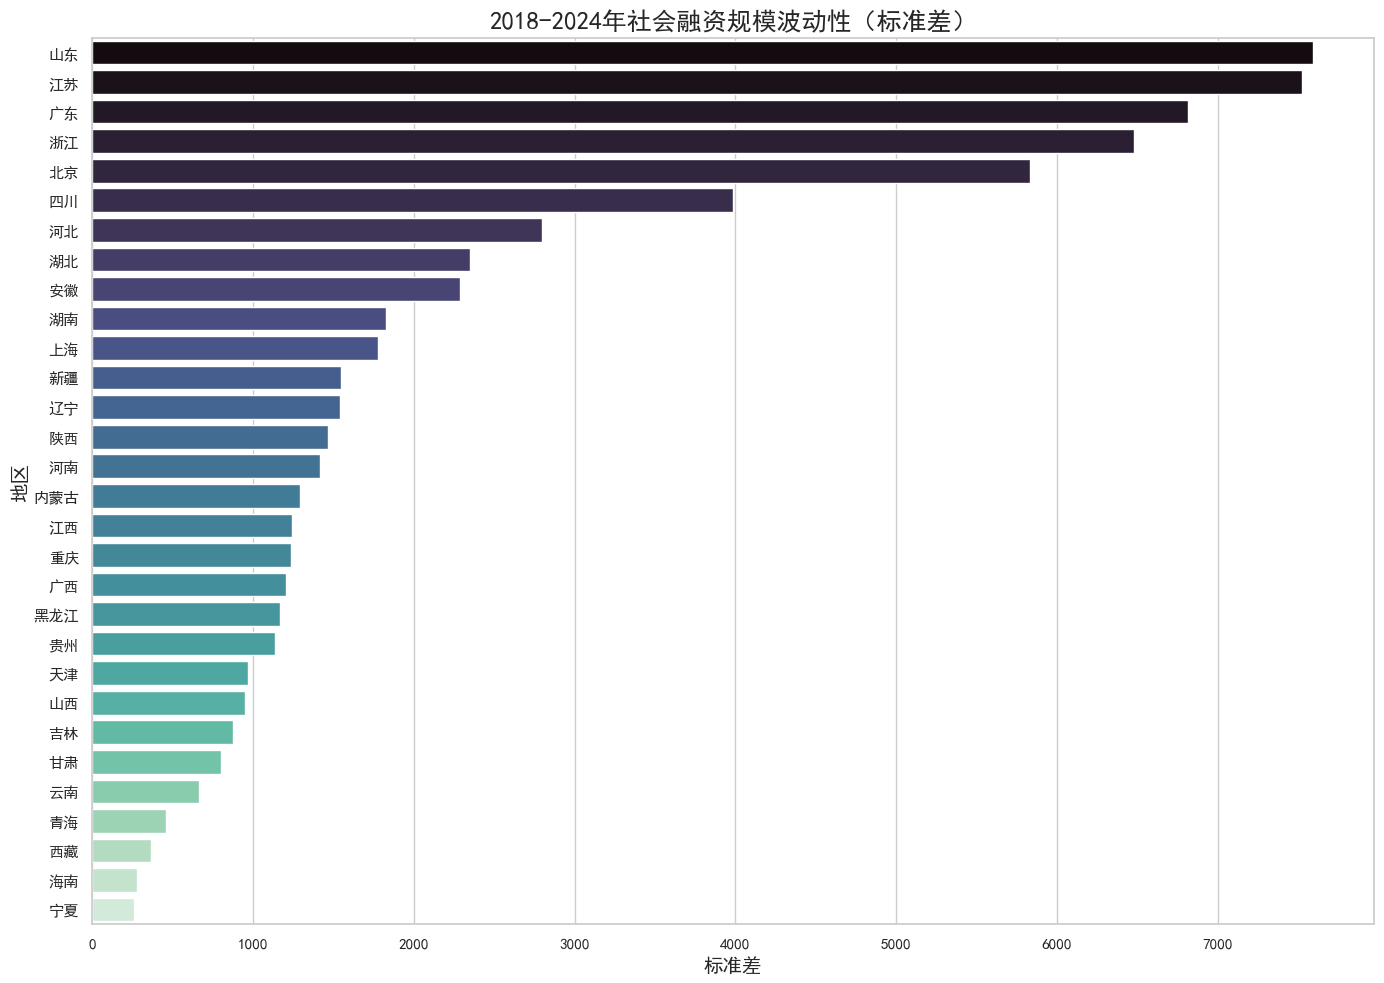

波动性Top5:
地区
山东    7591.022655
江苏    7523.877056
广东    6812.666449
浙江    6478.289582
北京    5829.574741
dtype: float64

波动性Bottom5:
地区
云南    663.634653
青海    456.823088
西藏    366.496021
海南    280.784869
宁夏    260.338059
dtype: float64


In [12]:

volatility = df.std()
volatility = volatility.sort_values(ascending=False)

plt.figure(figsize=(14,10))
sns.barplot(x=volatility.values, y=volatility.index, palette="mako")
plt.title("2018-2024年社会融资规模波动性（标准差）", fontsize=18)
plt.xlabel("标准差", fontsize=14)
plt.ylabel("地区", fontsize=14)
plt.tight_layout()
plt.show()

print("波动性Top5:")
print(volatility.head())

print("\n波动性Bottom5:")
print(volatility.tail())


## 4. 基于社融特征的聚类分析

c:\home\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\home\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\home\anaconda3\envs\myenv\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\home\anaconda3\envs\myenv\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\home\anaconda3\envs\myenv\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


     地区  聚类类别
0    北京     0
2    河北     0
15   湖北     0
14   河南     0
12   江西     0
13   山东     0
11   安徽     0
8    上海     0
21   四川     0
16   湖南     0
17   广东     1
7   黑龙江     2
3    山西     2
6    吉林     2
5    辽宁     2
4   内蒙古     2
24   西藏     2
25   陕西     2
1    天津     2
18   广西     2
19   海南     2
20   重庆     2
22   贵州     2
23   云南     2
28   宁夏     2
29   新疆     2
26   甘肃     2
27   青海     2
9    江苏     3
10   浙江     3


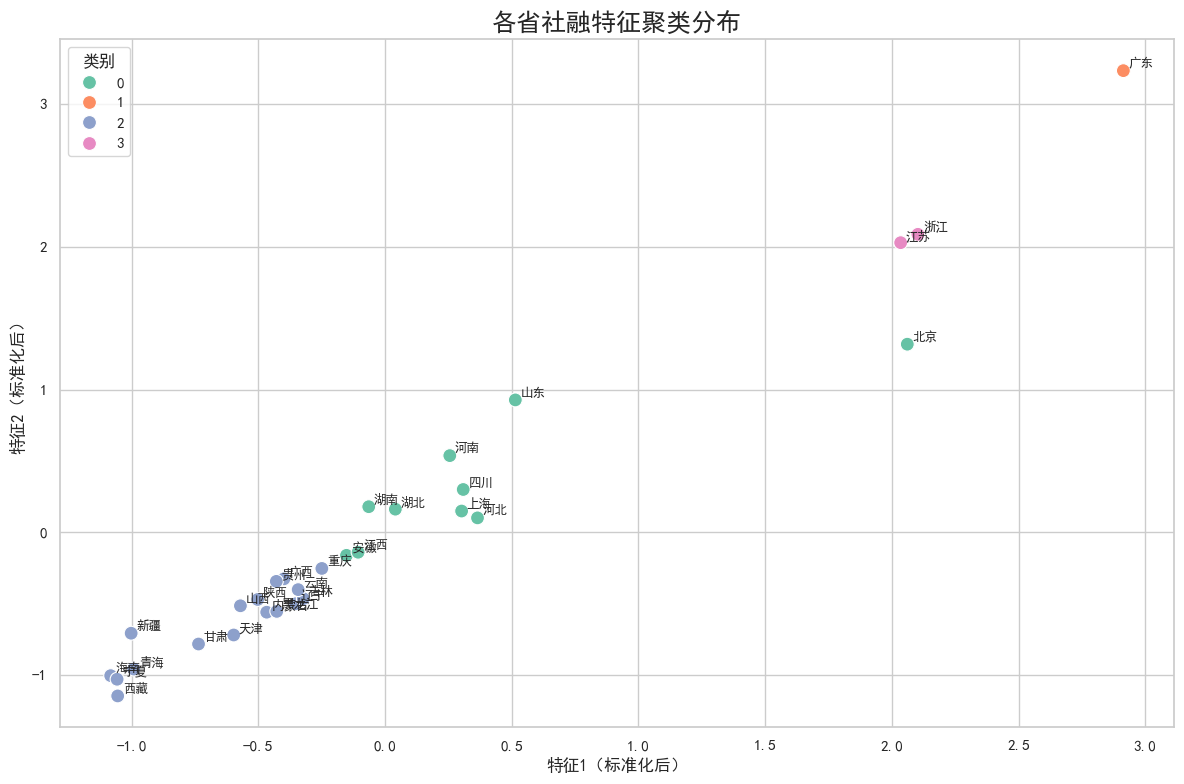

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df.T.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

cluster_result = pd.DataFrame({
    "地区": df.columns,
    "聚类类别": clusters
}).sort_values("聚类类别")

print(cluster_result)

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette="Set2", s=100)
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (X_scaled[i,0]+0.02, X_scaled[i,1]+0.02), fontsize=9)
plt.title("各省社融特征聚类分布", fontsize=18)
plt.xlabel("特征1（标准化后）")
plt.ylabel("特征2（标准化后）")
plt.legend(title="类别")
plt.tight_layout()
plt.show()


In [27]:
import warnings
warnings.filterwarnings("ignore")